# Exploratory Data Analysis: Titanic Dataset

In this notebook, I will be doing some data analysis on one of the most used datasets on Kaggle, the [Titanic](https://www.kaggle.com/c/titanic/data) dataset. The goal of this is to answer some of the initial questions I have as well as have a good grasp of Python and using Markdown to organize my content.

Some of the initial questions I have are:
- What does the data look like?
- Which columns / rows do we need to clean for missing values?
- What is the passenger make-up on the Titanic (i.e. gender, age etc.)?
- What factors affected the survival rate of passengers on the Titanic? 

In [50]:
import pandas as pd
import numpy as np

In [2]:
import os
working_directory = os.getcwd()
print(working_directory)

/home/allisonchaang3


In [3]:
### Loading the Titanic Dataset
path = working_directory + '/train.csv'
titanic = pd.read_csv(path)

## Step 1: Understanding the Dataset

I am going into this analysis as clean as a blank canvas, not knowing what information we have or what questions we want to answer. This initial exercise helps us get a better grasp on the dataset.

- ```titanic.head()```: Shows the first 5 rows of the dataset. We can always insert a value into the the function to change the number of rows we want to display. For example, ```titanic.head(20)``` will display 20 rows. 
- ```titanic.info()```: Shows a list of columns along with their data types *(floats, objects, integers etc.)*
- ```titanic.describe()```: Shows basic statistical data *(mean, max, min, percentile, etc.)*
- ```titanic.shape```: Shows number of rows and columns of a dataframe

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic.shape

(891, 12)

## Step 2: Data Cleaning for Missing Data (NaN values)

From the above information, we can see that there are several NaN entries in the **Cabin** column. Missing data is a big problem for data analysis because it distorts findings and can adversely affect the outcome of the analysis. Thus, we need to identity the columns / rows with missing values and drop them from the dataset.

Let's confirm that it is the only column with empty data.
- ```titanic.isnull()```: Returns a dataframe of boolen values mapped to TRUE (missing data) or FALSE (non-missing data) boolean outputs
- ```titanic.isnull().sum()```: Returns the total null values for each column of the dataframe. TRUE=1, FALSE=0

In [8]:
titanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

This revealed that the **Cabin** and **Age** column both have mostly NULL values. Out of the 891 entries, 20% of Age and 77%  of Cabin was NaN values.

There are 2 ways to remove missing data here: 
- ```titanic.dropna()``` removes entire rows with any missing values
    - We can see from below that the dataframe went from (891,12) to (183,12) whereby 708 rows of data was removed
- ```titanic.drop('ColumnName',axis=)``` removes specific rows / columns with specified label names
    -  We can see from below that the dataframe went from (891,12) to (891,10) whereby 2 columns of data was removed

In [14]:
droprows_titanic=titanic.dropna()
droprows_titanic.shape

(183, 12)

In [15]:
#specifying axis=1 specifies that we want to drop the column
drop_cabin_and_age=titanic.drop(['Cabin','Age'], axis=1)
drop_cabin_and_age.shape

(891, 10)

## Step 3: Creating visuals for the dataset

Let's separate the data into numeric and categorical variables so that it would simplify our process of choosing what graphs to best display the data. Since we dropped the **Cabin** and **Age** columns from the dataset, we are left with 10 columns. As of the 10, I think these are the most insightful:
- **Survived**: Whether or not the passenger survived (0= No, 1=Yes)
- **PClass**: Ticketc class (1st=1, 2=2nd, 3=3rd)
- **Sex**: Male / Female
- **Fare**
- **Embarked**: Point of embarkation (C=Cherbourg, Q=Queenstown, S=Southhampton)

In [30]:
titanic_numeric=drop_cabin_and_age[['Fare']]
titanic_categorical=drop_cabin_and_age[['Survived', 'Pclass','Sex', 'Embarked']]
titanic_categorical.columns

Index(['Survived', 'Pclass', 'Sex', 'Embarked'], dtype='object')

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

Given a list of columns, the ```for loop``` can be used to iterate over each item in the column and execute it. 
The 1st 'for' statement iterates over every row in the **Survived** column and outputs a histogram, before moving on to the next column. This occurs until they reach the last column defined in the for loop statement. 
- ```titanic_categorical.columns```: Shows list of columns in dataframe
- ```titanic_categorical[i].value_counts()```: Shows a series of unique values
- ```titanic_categorical[i].value_counts.index()```: Shows the index of values we are accounting for

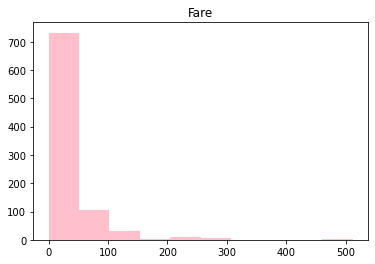

In [49]:
#i represented an index (for loops are zero-indexed) so the 1st column would be 'Fare'
for i in titanic_numeric.columns:
    plt.hist(titanic_numeric[i],color='pink')
    plt.title(i)

From our analysis below, we can see that:
1. Most of the passengers did not survive the Titanic shipwreck, only an 33% of the passengers in our dataset survived
2. The majority of passengers had 3rd class tickets, and the average fare was $32 
3. There were more males onboard as compared to females, roughly 50% more
4. The majority of passengers embarked the Titanic from Southhampton

/opt/conda/envs/ADA522/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


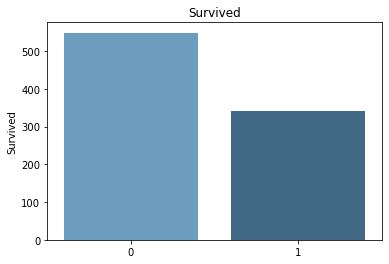

/opt/conda/envs/ADA522/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


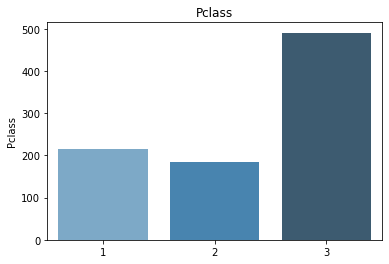

/opt/conda/envs/ADA522/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


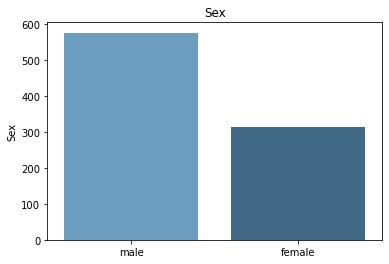

/opt/conda/envs/ADA522/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


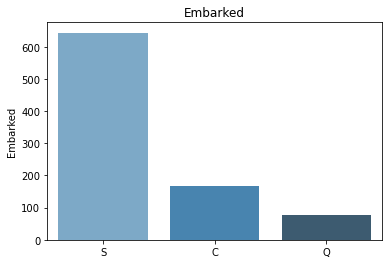

In [46]:
# first i= Survived, second i = Pclass etc.
# plt.title() takes in a string of text to use as the title
#df['column'].value_counts give number of 

for i in titanic_categorical.columns:
    index=titanic_categorical[i].value_counts().index
    values=titanic_categorical[i].value_counts()
    sns.barplot(index, values, palette='Blues_d').set_title(i)
    plt.show()


## Step 4: Exploring relationships between the columns

I want to dive into the survivial rates of the passengers on the Titanic, and explore whether their gender / PClass played a role in this probability. I will be using ```sns.factorplot()``` to compare multiplegroups of data together. 

**Hypothesis #1**:
- From this first chart below, we see that there were more female survivors than males. We can infer from this that females were prioritized in the rescue efforts. 

/opt/conda/envs/ADA522/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


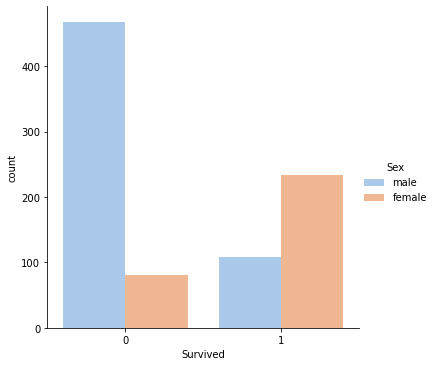

In [86]:
sns.factorplot(data=drop_cabin_and_age,
              x='Survived',
               hue='Sex',
               kind='count',
              palette='pastel')

**Hypothesis #2**:
- In this first graph below, we see that there was dispropportionately more deaths among Pclass 3 passengers, while there was slightly more survivors among Pclass 1 passengers.
- The second graph below reinforces our hypothesis,the survival rates for passengers in Pclass 1 was 40% higher than Pclass 3. This could indicate hat passengers in Pclass 1 were given priority when it came to rescue efforts. 

/opt/conda/envs/ADA522/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


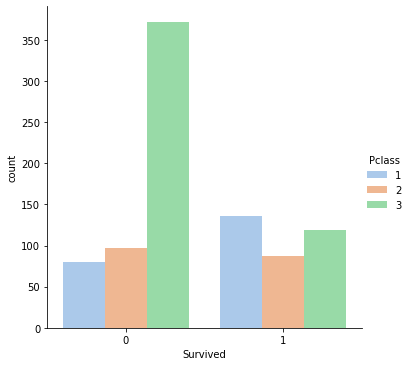

In [91]:
sns.factorplot(data=drop_cabin_and_age,
               x='Survived',
               hue='Pclass',
              kind='count',
              palette='pastel')

/opt/conda/envs/ADA522/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


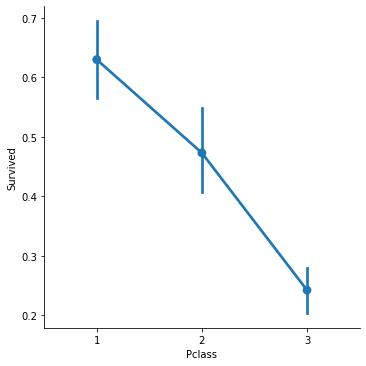

In [92]:
sns.factorplot(data=titanic,
              x='Pclass',
               y='Survived')